# O Objetivo desse Projeto é praticar a predição de valores de casas em Boston com o dataset compilado por Harrison e Rubinfeld em 1978

1. taxa_criminalidade: Taxa de criminalidade per capita por cidade
---------------------------------------------------------
2. prop_zonas_residenciais: Proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados
---------------------------------------------------------
3. prop_industrial: Proporção de acres comerciais não varejistas por cidade
---------------------------------------------------------
4. proximo_rio: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
---------------------------------------------------------
5. indice_oxido_nitroso: Concentração de óxidos nítricos (partes por 10 milhões)
---------------------------------------------------------
6. num_quartos: Número médio de quartos por habitação
---------------------------------------------------------
7. prop_antiguidade: Proporção de unidades ocupadas pelo proprietário construídas antes de 1940
---------------------------------------------------------
8. dist_centro: Distâncias ponderadas até cinco centros de emprego em Boston
---------------------------------------------------------
9. proximidade_autoestrada: Índice de acessibilidade às rodovias radiais
imposto_predial: Taxa de imposto sobre a propriedade de valor total por US$10.000
---------------------------------------------------------
10. razao_professores: Proporção aluno-professor por cidade

11. prop_negra: 1000(Bk - 0.63)^2 onde Bk é a proporção de negros por cidade
---------------------------------------------------------
12. status_socioeconomico: % status inferior da população
----------------------------------------------------------
13. preco_medio: Valor mediano das casas ocupadas pelos proprietários em US$1000s



In [85]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega o conjunto de dados em um dataframe
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
cols = ["taxa_criminalidade", "prop_zonas_residenciais", "prop_industrial", "proximo_rio",
        "indice_oxido_nitroso", "num_quartos", "prop_antiguidade", "dist_centro",
        "proximidade_autoestrada", "imposto_predial", "razao_professores", "prop_negra",
        "status_socioeconomico", "preco_medio"]
df = pd.read_csv(url, header=None, delimiter=r"\s+", names=cols)

# Exibe as primeiras linhas do dataframe
df.head()

,taxa_criminalidade,prop_zonas_residenciais,prop_industrial,proximo_rio,indice_oxido_nitroso,num_quartos,prop_antiguidade,dist_centro,proximidade_autoestrada,imposto_predial,razao_professores,prop_negra,status_socioeconomico,preco_medio
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##Analisar o DataFrame

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   taxa_criminalidade       506 non-null    float64
 1   prop_zonas_residenciais  506 non-null    float64
 2   prop_industrial          506 non-null    float64
 3   proximo_rio              506 non-null    int64  
 4   indice_oxido_nitroso     506 non-null    float64
 5   num_quartos              506 non-null    float64
 6   prop_antiguidade         506 non-null    float64
 7   dist_centro              506 non-null    float64
 8   proximidade_autoestrada  506 non-null    int64  
 9   imposto_predial          506 non-null    float64
 10  razao_professores        506 non-null    float64
 11  prop_negra               506 non-null    float64
 12  status_socioeconomico    506 non-null    float64
 13  preco_medio              506 non-null    float64
dtypes: float64(12), int64(2)
m

como podemos ver o dataframe não tem valores vazious

In [87]:
df.describe()

,taxa_criminalidade,prop_zonas_residenciais,prop_industrial,proximo_rio,indice_oxido_nitroso,num_quartos,prop_antiguidade,dist_centro,proximidade_autoestrada,imposto_predial,razao_professores,prop_negra,status_socioeconomico,preco_medio
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


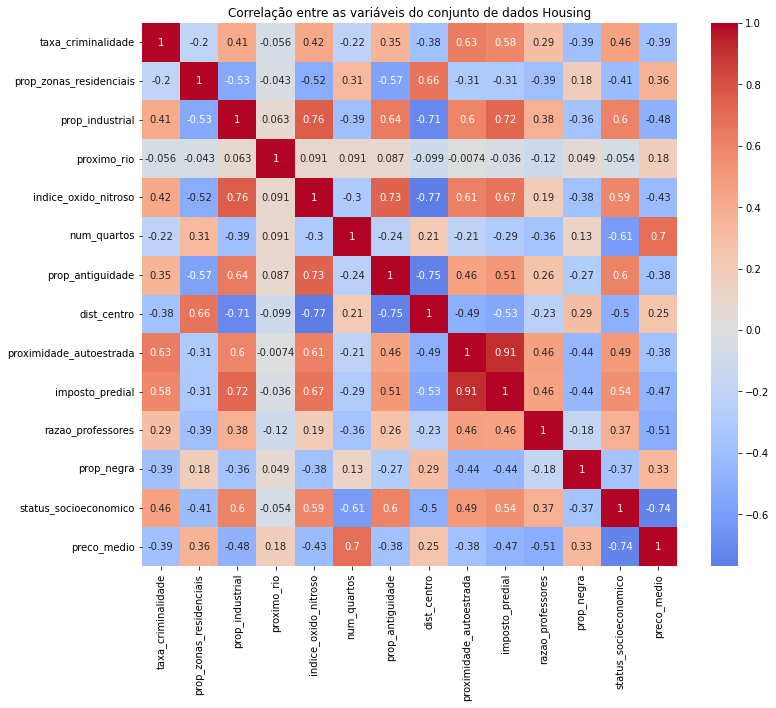

In [88]:
corr = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre as variáveis do conjunto de dados Housing')
plt.show()

## Treinar Modelo

In [89]:
#separando as Variaves para treino e teste
X = df.drop('preco_medio', axis=1)
y = df['preco_medio']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Treinando o modelo de regressão linear
reg = LinearRegression().fit(X_train, y_train)

In [91]:
# Avaliando o modelo no conjunto de teste
y_pred = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
#Erro Quadrático Médio da Raiz
import math
print("RMSE = ",math.sqrt(mean_squared_error(y_test, y_pred)),'mil dolares')

14.995852876582536
0.7598135533532492
RMSE =  3.8724479178657183 mil dolares


## Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
# Avaliando o modelo no conjunto de teste
y_pred = rf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
#Erro Quadrático Médio da Raiz
import math
print("RMSE = ",math.sqrt(mean_squared_error(y_test, y_pred)),'mil dolares')

9.217656627450989
0.8523621023773426
RMSE =  3.0360593912917757 mil dolares


como podemos ver está melhor do que o linear regression

## Vizualização da precisão do modelo

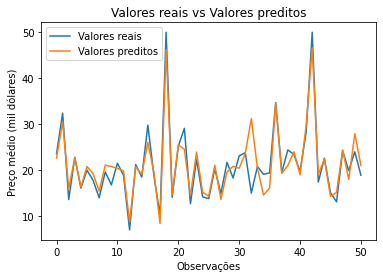

In [93]:
plt.plot(y_test.values, label='Valores reais')
plt.plot(y_pred, label='Valores preditos')
plt.legend()
plt.xlabel('Observações')
plt.ylabel('Preço médio (mil dólares)')
plt.title('Valores reais vs Valores preditos')
plt.show()

## Shap Analisar a importancia de cada coluna para o modelo Random Forest

In [94]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


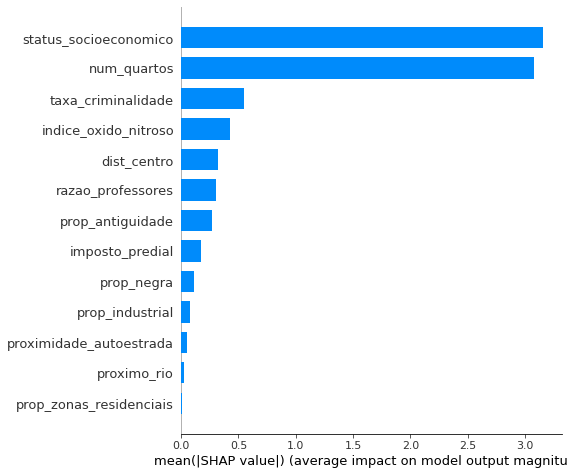

In [95]:
import shap

# Cria um objeto explainer com o modelo treinado e os dados de teste
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
# Plotando um gráfico de resumo do SHAP para a feature de "num_quartos"
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)
